In [234]:
# Dependencies
import requests
import json
import os
from dotenv import load_dotenv
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [235]:
# Load environment variables from .env file
load_dotenv()

# Access the API key
api_key = os.getenv('api_key')

# place the url
url1 = 'https://v6.exchangerate-api.com/v6/'

query_url2 = url1 + api_key + '/latest' + '/AUD'

# Get the data into a JSON format
data2 = requests.get(query_url2).json()


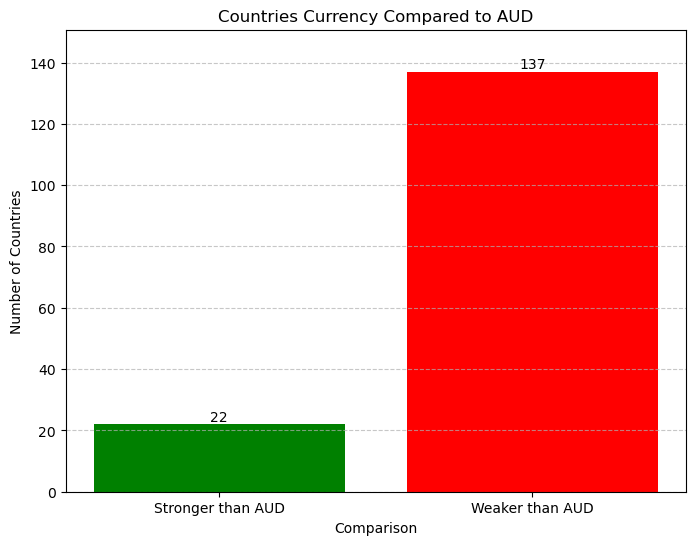

In [240]:
# Convert the dictionary to a dataframe
exchange_rates_df = pd.DataFrame(data2)
exchange_rates_df.head()

# Set a initial value for calculate
stronger_than_aud_count = 0
weaker_than_aud_count = 0

# Loop for calculate sum
for currency, rate in exchange_rates_df['conversion_rates'].items():
    if rate > 1:
        weaker_than_aud_count += 1
    elif rate < 1:
        stronger_than_aud_count += 1

# Make charts
plt.figure(figsize=(8, 6))
bars = plt.bar(['Stronger than AUD', 'Weaker than AUD'], [stronger_than_aud_count, weaker_than_aud_count], color=['green', 'red'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

# Set axis labels and title   
plt.xlabel('Comparison')
plt.ylabel('Number of Countries')
plt.title('Countries Currency Compared to AUD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(stronger_than_aud_count, weaker_than_aud_count) * 1.1)  

plt.show()

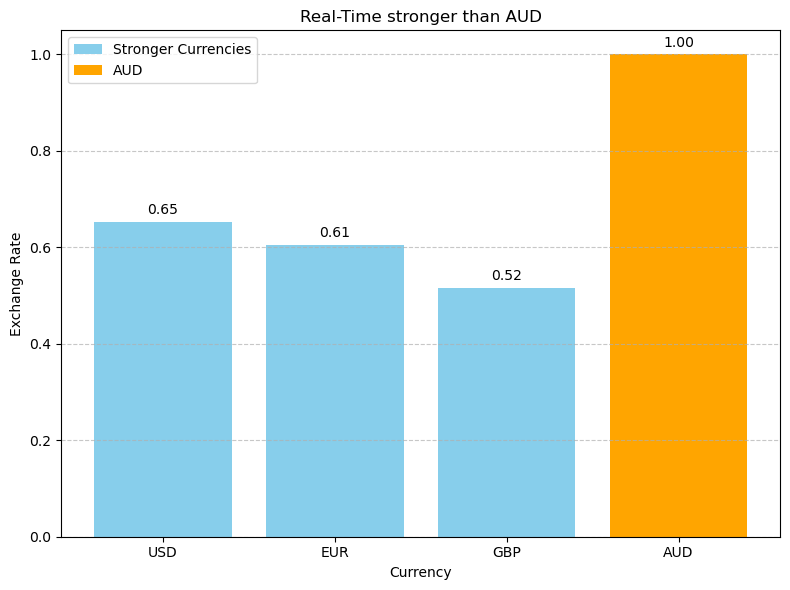

In [242]:
# Add some stronger currencies
base_currency = 'AUD'
specific_currencies = ['USD', 'EUR', 'GBP']

# Make a comprehension dict
exchange_rates = {currency: data2['conversion_rates'][currency] for currency in specific_currencies}

# Extract AUD exchange rate
aud_exchange_rate = data2['conversion_rates'][base_currency]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(specific_currencies, exchange_rates.values(), color='skyblue', label='Stronger Currencies')
aud_bar = plt.bar(base_currency, aud_exchange_rate, color='orange', label='AUD')

# Add annotations on top of each bar
for currency, rate in exchange_rates.items():
    plt.text(currency, rate + 0.01, f'{rate:.2f}', ha='center', va='bottom', fontsize=10)

# Add annotation beside the AUD bar
plt.text(base_currency, aud_exchange_rate + 0.01, f'{aud_exchange_rate:.2f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')
plt.title('Real-Time stronger than AUD')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

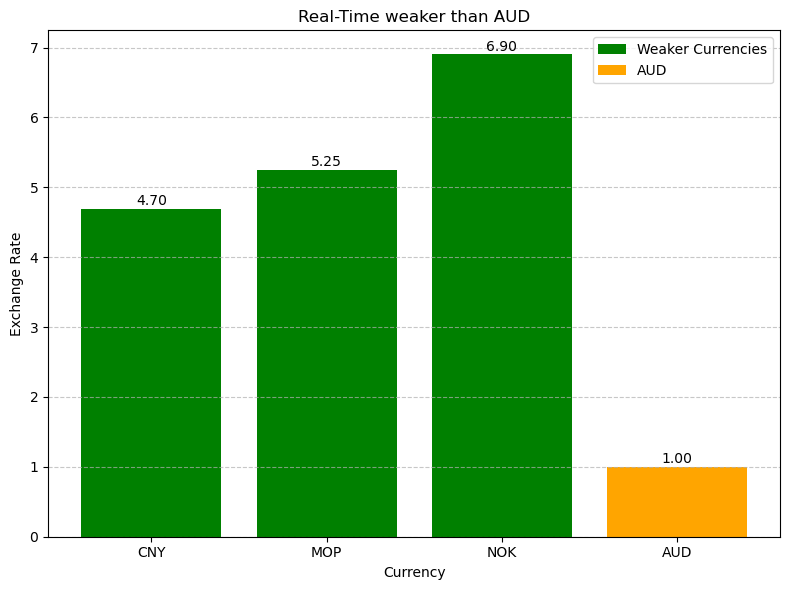

In [243]:
# Add some weaker currencies
weak_currencies = ['CNY', 'MOP', 'NOK'] 
weak_exchange_rates = {currency: data2['conversion_rates'].get(currency, 0) for currency in weak_currencies}

# Plot bar chart for weaker currencies
plt.figure(figsize=(8, 6))
plt.bar(weak_currencies, weak_exchange_rates.values(), color='green', label='Weaker Currencies')

# Plot bar for AUD exchange rate
plt.bar('AUD', aud_exchange_rate, color='orange', label='AUD')

# Add annotations on top of each bar
for currency, rate in weak_exchange_rates.items():
    plt.text(currency, rate + 0.01, f'{rate:.2f}', ha='center', va='bottom', fontsize=10)

# Add annotation beside the AUD bar
plt.text('AUD', aud_exchange_rate + 0.01, f'{aud_exchange_rate:.2f}', ha='center', va='bottom', fontsize=10)

# Set axis labels and title
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')
plt.title('Real-Time weaker than AUD')
plt.xticks(range(len(weak_currencies) + 1), weak_currencies + ['AUD'])  # Include AUD as a tick label
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
